In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi, norm

Simulating pink noise according to definition in
https://en.wikipedia.org/wiki/Pink_noise

In [131]:
chiDOF = 2 # corresponds to Rayleigh distribution
nFreqs = 10000
sigma = 2
L = 7

def freezeSignal(nFreqs, sigma, L):
    us = 1+np.arange(nFreqs)
    freqAmps = sigma*np.sqrt(L/2)*chi.rvs(chiDOF, size=nFreqs)/us
    freqPhases = 2*np.pi*np.random.uniform(size=nFreqs)
    def evalSignal(x):
        return np.sum(freqAmps*np.sin((2*np.pi/L)*np.outer(us,x).T + freqPhases), 1)
    return evalSignal

sig = freezeSignal(nFreqs, sigma, L)

In [132]:
nSamples = 10000
xs = np.linspace(0, L, nSamples)
ys = sig(xs)

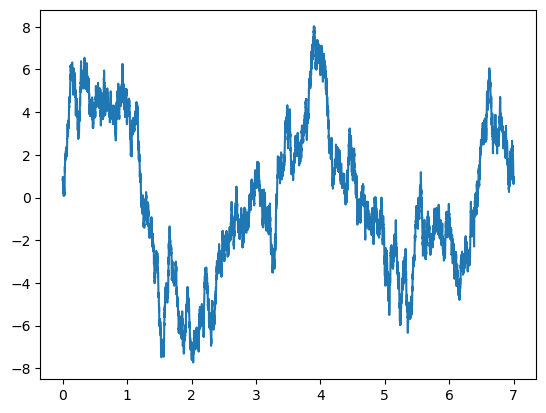

In [136]:
plt.plot(xs, ys)

[]

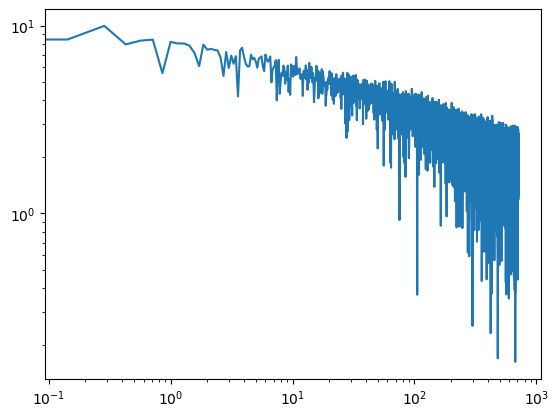

In [135]:
fftVals = np.abs(np.fft.fft(ys))
fftFreqs = np.fft.fftfreq(nSamples, L/nSamples)
nPlot = fftFreqs.size//2
plt.plot(fftFreqs[:nPlot], np.log(1+fftVals[:nPlot]))
plt.loglog()

Band-limited white noise

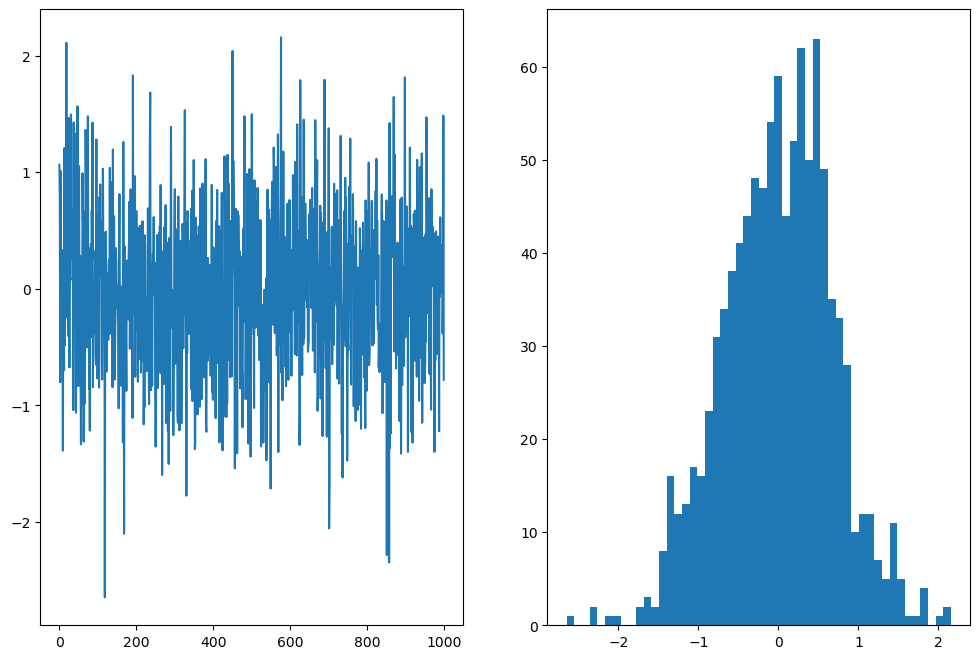

In [190]:
# Seems to be some weird scaling going on here.  When I input a standard normal distribution in
# the frequency domain, I expected to get a standard normal in the time domain.  But the variance
# has an extra factor of sqrt(n) somewhere
nWhiteFreqs = 1000
nTimeSamps = 1000
whiteReal = np.random.normal(loc=0, scale=1, size=nWhiteFreqs)
whiteReal[0] = 0
whiteImag = np.random.normal(loc=0, scale=1, size=nWhiteFreqs)
whiteImag[0] = 0

sig = np.real(np.sqrt((nTimeSamps)/2)*np.fft.ifft(whiteReal + 1j*whiteImag, n=nTimeSamps,  norm='backward'))
f1 = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(sig)
#plt.ylim([-4,4])
plt.subplot(1,2,2)
plt.hist(np.real(sig), bins=50);

In [188]:
norm.fit(sig)

(5.3290705182007515e-18, 0.696523215247839)

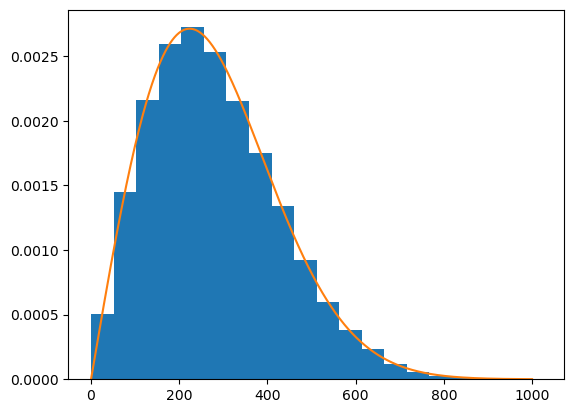

In [77]:
n = 100000
forwardFreqs = np.fft.fft(np.random.normal(size=n))
plt.hist(np.abs(forwardFreqs), bins=20, density=True);
xChi = np.linspace(0,1000,1000)

plt.plot(xChi, chi(2, 0, np.sqrt(n/2)).pdf(xChi))